# Telco Churn Model <a name="top"></a>

Prepared by Alex Aw   
6th July 2022


## Table of Content 
1. [Background and Objective](#bgobjective)   
2. [Initial EDA](#inieda)   
3. [Loading Data, Packages and Data Understanding](#data)   
4. [Data Cleaning & Manipulation](#clean)   
5. [EDA & Visualization](#edavis)   
    5.1 [Categorical Variable Analysis](#catvarana)   
    5.2 [Monthly Charges](#mthcharge)   
    5.3 [Tenure vs Churn](#tenure)   
    5.4 [Reasons for Churn](#reason)   
6. [Data Preprocessing](#prepro)   
    6.1 [Multi-collinearity](#mulcoll)   
    6.2 [Train Test Split](#traintest)   
7. [Modelling](#modelling)   
    7.1 [Logistic Regression](#logreg)   
    7.2 [Random Forest Classifier](#ranfor)   
    7.3 [Artificial Neural Network](#ann)   
8. [Models Comparison](#modcom)   
9. [Future Work](#futwork)
10. [Campaign Analysis](#camana)   

### Background <a name="bgobjective"></a>
36% of customers are churning from the telco company within the time period of the dataset. Given in the dataset are 7043 customer information of their engaged services including whether the customer had churned. 

### Objective
1) Using EDA and Visualization to gain actionable insights into the situation.   
2) Build a predictive model that will be able to correctly identify customer that are likely to churn. 

[ Back to top ](#top)

## Initial EDA <a name="inieda"></a>

A dashboard was build on Power BI to provide insights and understanding of the dataset. It is not exhaustive nor real time, meant for quick analysis on the behavior of the customers and the possible reasons for churning. PIBX file has been included together with this IPYNB file. 

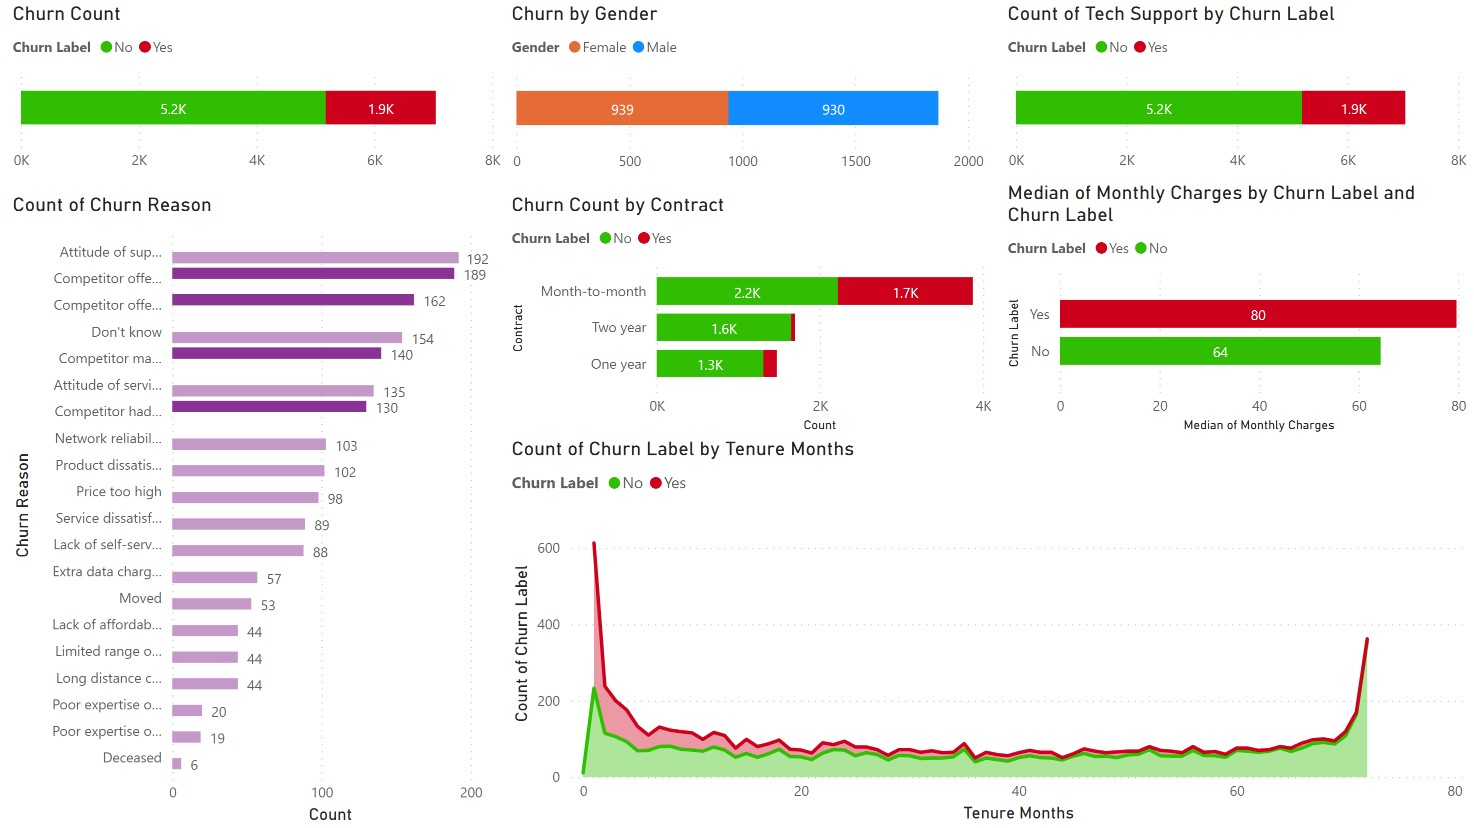

[ Back to top ](#top)

## Loading Data, Packages and Data Understanding <a name="data"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
# Functions
def quick_look(df):
    print("Shape:", df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          '-'*76, "\nInfo:\n")
    print(df.info(), '\n', '-'*76)
    print("Number of Uniques:\n", df.nunique(),'\n', '-'*76)
    print("Missing Values:\n", missing_values(df),'\n', '-'*76)
    print("All Columns:", list(df.columns),'\n', '-'*76)

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print("Columns after rename:", list(df.columns),'\n', '-'*76)
    
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values    
    
def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

# column info
def col_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [ ]:
# Loading the data
dfRaw = pd.read_excel('Customer Churn.xlsx', index_col=0)

In [6]:
dfRaw.head().transpose()

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male


In [7]:
quick_look(dfRaw)

Shape: (7043, 30) 
 There is  7043  observation and  30  columns in the dataset. 
 ---------------------------------------------------------------------------- 
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  

[ Back to top ](#top)

## Data Cleaning & Manipulation <a name="clean"></a>
Assumptions: The telco pricing and service level are uniform across the state. 

Geographical information will be dropped together with customer ID.   
Count does not provide any purpose nor information and will be dropped.   
73% of reason for churning is missing, hence it will be dropped.

In [8]:
dfRaw.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices


In [9]:
# Dropping of columns
dropList = ['customerid', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'churn_reason']
df = dfRaw.drop(dropList, axis = 1)
list(df.columns)

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure_months',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'churn_label']

In [10]:
# unify numeric data type
df['tenure_months']= df['tenure_months'].astype(float)

In [11]:
# converting total_charges to numeric
df['total_charges'] = pd.to_numeric(df.total_charges, errors='coerce')
df.isnull().sum()

gender                0
senior_citizen        0
partner               0
dependents            0
tenure_months         0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn_label           0
dtype: int64

In [12]:
# total_charges now has 11 NA. 
df[np.isnan(df['total_charges'])]

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label
2234,Female,No,Yes,No,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
2438,Male,No,No,No,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
2568,Female,No,Yes,No,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
2667,Male,No,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
2856,Female,No,Yes,No,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
4331,Male,No,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4687,Male,No,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
5104,Female,No,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5719,Male,No,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6772,Female,No,Yes,Yes,0.0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
# These 11 rows with NA total_charges also has 0 tenure_months, which appears to be unique. Since the numbers are small, 
# removing from the dataset will have negligible effect on the overall data. 

df.loc[df['tenure_months'] == 0].count()

gender               11
senior_citizen       11
partner              11
dependents           11
tenure_months        11
phone_service        11
multiple_lines       11
internet_service     11
online_security      11
online_backup        11
device_protection    11
tech_support         11
streaming_tv         11
streaming_movies     11
contract             11
paperless_billing    11
payment_method       11
monthly_charges      11
total_charges         0
churn_label          11
dtype: int64

In [14]:
df.drop(labels=df[df['tenure_months'] == 0].index, axis=0, inplace=True)
df[df['tenure_months'] == 0].index

Int64Index([], dtype='int64')

In [15]:
col_look('total_charges')

column name    :  total_charges
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6530
20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
444.75      1
5459.20     1
295.95      1
394.10      1
6844.50     1
Name: total_charges, Length: 6530, dtype: int64


In [16]:
# Services such as multiple_lines, online_security, etc should be binary, yet it has a 3rd category 
# such as "No phone service" and "No internet service". Merging them under "No" to correctly make
# the variable binary.
df.nunique()

gender                  2
senior_citizen          2
partner                 2
dependents              2
tenure_months          72
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1584
total_charges        6530
churn_label             2
dtype: int64

In [17]:
df["multiple_lines"]= df["multiple_lines"].replace("No phone service", "No")

In [18]:
bundle=["online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]
df[bundle] = df[bundle].replace("No internet service", "No")

[ Back to top ](#top)

## EDA & Visualization <a name="edavis"></a>

In [19]:
# Numerical columns
numCol=['tenure_months', 'monthly_charges', 'total_charges']
df[numCol].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure_months,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [20]:
# Categorical columns
catCol=['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 
         'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
         'contract', 'paperless_billing', 'payment_method']
df[catCol].describe().transpose()

,count,unique,top,freq
gender,7032,2,Male,3549
senior_citizen,7032,2,No,5890
partner,7032,2,No,3639
dependents,7032,2,No,5412
phone_service,7032,2,Yes,6352
multiple_lines,7032,2,No,4065
internet_service,7032,3,Fiber optic,3096
online_security,7032,2,No,5017
online_backup,7032,2,No,4607
device_protection,7032,2,No,4614


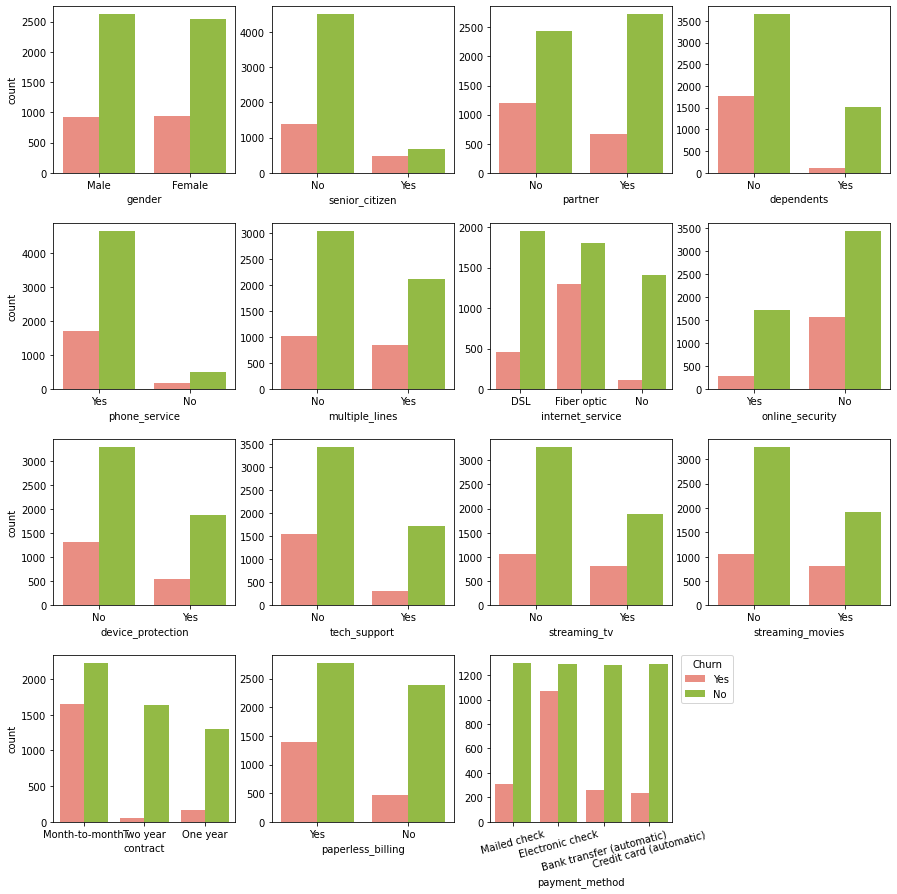

In [21]:
# Categorical plotting and comparison
fig, axes = plt.subplots(4, 4, figsize=(15,15))
fig.delaxes(axes[3,3])
ax = sns.countplot(x="gender", hue="churn_label", data=df, ax=axes[0, 0], palette=['salmon','yellowgreen'])
ax.legend_.remove()
ax = sns.countplot(x="senior_citizen", hue="churn_label", data=df, ax=axes[0, 1], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="partner", hue="churn_label", data=df, ax=axes[0, 2], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="dependents", hue="churn_label", data=df, ax=axes[0, 3], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="phone_service", hue="churn_label", data=df, ax=axes[1, 0], palette=['salmon','yellowgreen'])
ax.legend_.remove()
ax = sns.countplot(x="multiple_lines", hue="churn_label", data=df, ax=axes[1, 1], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="internet_service", hue="churn_label", data=df, ax=axes[1, 2], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="online_security", hue="churn_label", data=df, ax=axes[1, 3], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="device_protection", hue="churn_label", data=df, ax=axes[2, 0], palette=['salmon','yellowgreen'])
ax.legend_.remove()
ax = sns.countplot(x="tech_support", hue="churn_label", data=df, ax=axes[2, 1], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="streaming_tv", hue="churn_label", data=df, ax=axes[2, 2], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="streaming_movies", hue="churn_label", data=df, ax=axes[2, 3], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="contract", hue="churn_label", data=df, ax=axes[3, 0], palette=['salmon','yellowgreen'])
ax.legend_.remove()
ax = sns.countplot(x="paperless_billing", hue="churn_label", data=df, ax=axes[3, 1], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.legend_.remove()
ax = sns.countplot(x="payment_method", hue="churn_label", data=df, ax=axes[3, 2], palette=['salmon','yellowgreen'])
ax.set(ylabel=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

[ Back to top ](#top)

### Categorical Variable Analysis <a name="catvarana"></a>
#### Noteworthy variables:   
<b>senior_citizen</b> : Although senior citizen has less churn compared to non-senior, huge portion of seniors churned. Seniors tend to be more price sensitive and are likely to shop for bargain.  
<b>partners and dependents</b> : Users with no partners or dependents are more likely to churn.   
<b>internet_services</b> : High proportion of Fiber optics users churned, compared to DSL. Possibly users are looking for reliable high end internet speed.   
<b>online_security, device_protection, tech_support</b> : Users without these add-on services tend to churn. High chance these users are price sensitive and prefers no frill packages. Alternatively users could have churned due to the lack of these services, because they feel un-protected by the Telco.    
<b>contract</b> : Users with no contract have very high tendency to churn. Users not tied to a contract could be testing out the service or waiting for better offers and promotions.   
<b>paperless_billing and electronic check</b> : Users of such billing method have higher tendency to churn especially Eletronic check. It is worth further analysing on this behavior.



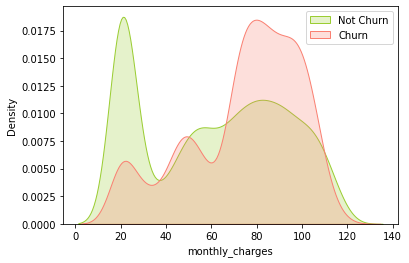

In [22]:
# Monthly charges
ax = sns.kdeplot(df.monthly_charges[(df["churn_label"] == 'No') ],
                color="yellowgreen", shade = True);
ax = sns.kdeplot(df.monthly_charges[(df["churn_label"] == 'Yes') ],
                ax =ax, color="salmon", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');

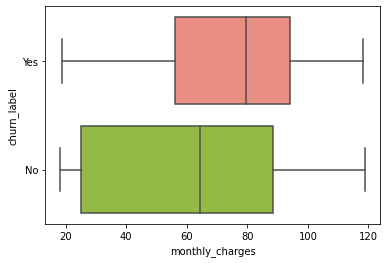

In [23]:
sns.boxplot(data=df, x="monthly_charges", y="churn_label", palette=['salmon','yellowgreen'])

[ Back to top ](#top)

#### Monthly Charges <a name="mthcharge"></a>
Churn rate increases as the price increases. Median price for users who churn are at around \\$80, while those to stayed have a median price of about \\$65.

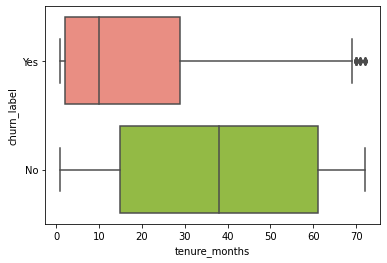

In [24]:
# Tenure vs Churn
sns.boxplot(data=df, x="tenure_months", y="churn_label", palette=['salmon','yellowgreen'])

#### Tenure vs Churn <a name="tenure"></a>
50% of churners are likely to do so within first 10 months, and 25% appear to churn during the first 2 months. The company is having difficulty retaining new users.

[ Back to top ](#top)

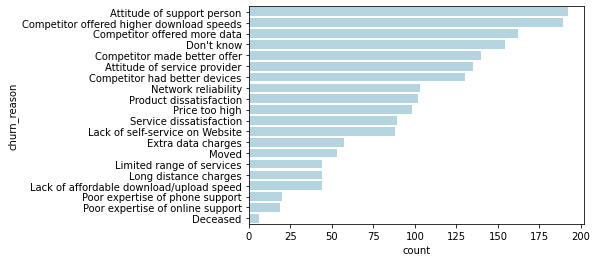

In [25]:
# Reasons for leaving
sns.countplot(data=dfRaw, y='churn_reason', 
              order=dfRaw['churn_reason'].value_counts().index, color="lightblue");

#### Reasons for Churn <a name="reason"></a>

Although reasons for churn have 73% missing data, the remaining 27% can provide some insights into users' disatisfaction. The top few reasons outlined that competitors had better options for the users. 

[ Back to top ](#top)

## Data Preprocessing <a name="prepro"></a>

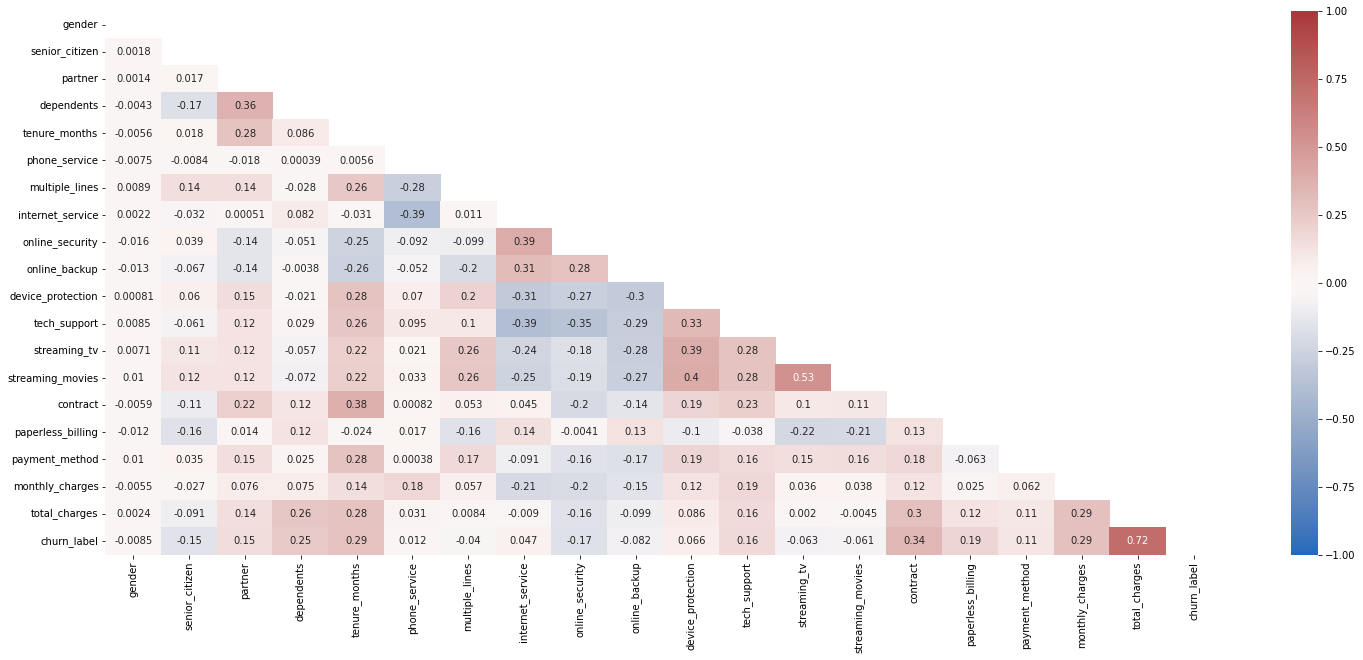

In [26]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, annot=True, cmap='vlag', vmin=-1, vmax=1)

[ Back to top ](#top)

### Multi-collinearity <a name="mulcoll"></a>

Not surprising streaming_tv and streaming_movies has the highest correlation at 0.81, where both are likely to be purchased together as a bundle. Other online related services such as tech support, online_backup, etc has somewhat higher correlation to each other as indicated in the middle of the heatmap, because users usually purchase them in a bundle or none at all. Since there are no extreme collinearity, I'll opt to keep all the variables. 

It was interesting to note that tenure_months and total_charges had low correlation, which went against my expectation. One would expect that with longer tenure, the total charges will increase in tandem, hence a positive correlation. 

[ Back to top ](#top)

### Train Test Split <a name="traintest"></a>

In [27]:
df.head(3)

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label
0,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,No,No,Yes,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [28]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(sparse=False, drop="if_binary")

# generate one-hot encoded df for categorical data
enc_df = enc.fit_transform(df[catCol])
enc_df = pd.DataFrame(enc_df, columns=enc.get_feature_names(df[catCol].columns))

#merge with numerical df for input
num_df = df[numCol].reset_index(drop=True)
X = num_df.join(enc_df)

X.head(3)

,tenure_months,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,internet_service_DSL,...,streaming_tv_Yes,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,2.0,53.85,108.15,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,70.70,151.65,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8.0,99.65,820.50,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
y = df["churn_label"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [31]:
print("Train : ", X_train.shape, y_train.shape)
print("Test  : ", X_test.shape,  y_test.shape)

Train :  (5625, 26) (5625,)
Test  :  (1407, 26) (1407,)


In [32]:
# scaling the numerical data
scaler= StandardScaler()
X_train[numCol] = scaler.fit_transform(X_train[numCol])
X_test[numCol] = scaler.transform(X_test[numCol])

In [33]:
X_train.head().transpose()

,5472,5425,3563,2096,7008
tenure_months,0.606285,-0.824867,0.647175,0.810735,0.320055
monthly_charges,1.614232,-0.656625,1.317312,-1.326768,0.949065
total_charges,1.351847,-0.771536,1.241213,-0.459349,0.660184
gender_Male,1.000000,0.000000,0.000000,1.000000,0.000000
senior_citizen_Yes,0.000000,0.000000,1.000000,0.000000,0.000000
partner_Yes,1.000000,0.000000,1.000000,1.000000,0.000000
dependents_Yes,1.000000,0.000000,1.000000,1.000000,0.000000
phone_service_Yes,1.000000,1.000000,1.000000,1.000000,1.000000
multiple_lines_Yes,1.000000,0.000000,0.000000,1.000000,1.000000
internet_service_DSL,0.000000,1.000000,0.000000,0.000000,0.000000


[ Back to top ](#top)

## Modelling <a name="modelling"></a>

In [34]:
def run_model_N_eval(X_train, X_test, y_train, y_test, model="RF"):
    if model == "RF":
        model_def = RandomForestClassifier()
        model_txt = "Random Forest Classifier"
    elif model == "LR":
        model_def = LogisticRegression()
        model_txt = "Logistic Regression"
    elif model =="DT":    
        model_def = tree.DecisionTreeClassifier()
        model_txt = "Decision Tree Classifier"
    elif model == "SVM":
        model_def = svm.LinearSVC(C=1.0)
        model_txt = "SVM"
    else:
        print("WRONG model type specified")
        return None
    
    model_def.fit(X_train,y_train )

    predicted_test = model_def.predict(X_test)
    predicted_train = model_def.predict(X_train)

    cf_train_matrix = metrics.confusion_matrix(y_train, predicted_train)
    cf_test_matrix = metrics.confusion_matrix(y_test, predicted_test)
    
    print('\033[1m' + model_txt , "Model" + '\033[0m')

    print("Labels:", y_train.unique(), "\n")

    # print("\n","#"*76)

    # print("For Training Data:")
    # print(cf_train_matrix, "\n")
    # plt.figure(figsize=(10,8))
    # sns.heatmap(cf_train_matrix, annot=True, fmt='d', vmin=0, vmax=y_train.shape[0]/len(y_train.unique()), cmap="Blues")
    # plt.title("Training Data Confusion Matrix Heatmap")
    # plt.xlabel('Predicted Labels')
    # plt.ylabel('Actual Labels')
    # plt.show()
    # print("Accuracy:",round(np.mean(predicted_train == y_train),3), "\n" )
    # print(metrics.classification_report(y_train, predicted_train), "\n" )

    print("\n","#"*76)

    print("For Testing Data:")
    print(cf_test_matrix, "\n" )
    plt.figure(figsize=(10,8))
    labelList = ["No", "Yes"]
    sns.heatmap(cf_test_matrix, annot=True, fmt='d', vmin=0, vmax=y_test.shape[0]/len(y_train.unique()),
                cmap="Blues", xticklabels=labelList, yticklabels=labelList)
    plt.title("Testing Data Confusion Matrix Heatmap")
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()
    print("Accuracy:",round(np.mean(predicted_test == y_test),3), "\n" )
    print(metrics.classification_report(y_test, predicted_test), "\n" )

    print("\n","#"*76)
       
    return None

[ Back to top ](#top)

### Logistic Regression <a name="logreg"></a>

Logistic Regression Model
Labels: ['No' 'Yes'] 


 ############################################################################
For Testing Data:
[[934  89]
 [169 215]] 



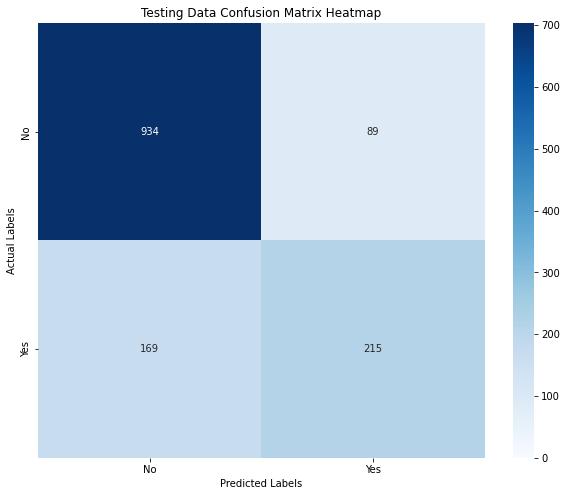

Accuracy: 0.817 

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1023
         Yes       0.71      0.56      0.62       384

    accuracy                           0.82      1407
   macro avg       0.78      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407
 


 ############################################################################


In [35]:
run_model_N_eval(X_train, X_test, y_train, y_test, "LR")

[ Back to top ](#top)

### Random Forest Classifier <a name="ranfor"></a>

Random Forest Classifier Model
Labels: ['No' 'Yes'] 


 ############################################################################
For Testing Data:
[[940  83]
 [203 181]] 



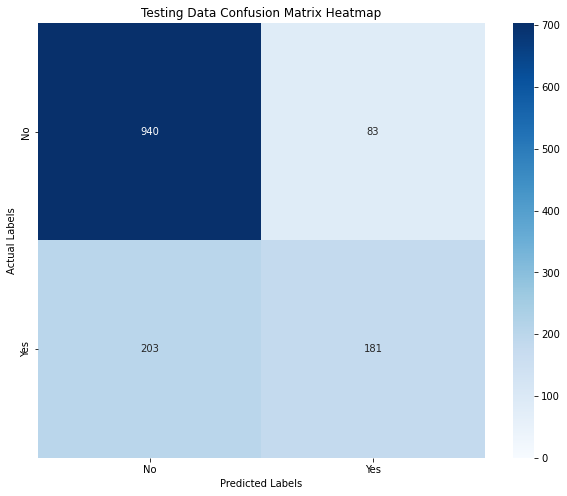

Accuracy: 0.797 

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1023
         Yes       0.69      0.47      0.56       384

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.78      1407
 


 ############################################################################


In [36]:
run_model_N_eval(X_train, X_test, y_train, y_test, "RF")

[ Back to top ](#top)

### Artificial Neural Network <a name="ann"></a>

In [37]:
import tensorflow
tensorflow.random.set_seed(123)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow import keras

In [38]:
# converting labels to numeric for NN
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


In [39]:
# define sequential model
NNmodel = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [40]:
# compilation and fitting of neural network.
NNmodel.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

NNmodel.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4925 - accuracy: 0.7536
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7977
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4117 - accuracy: 0.8018
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8064
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4025 - accuracy: 0.8069
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8117
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8128
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8153
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8174
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3922 - accura

In [42]:
# predict the churn values
y_pred = NNmodel.predict(X_test)
print(y_pred)
# unscaling the ypred values 
y_pred_lis = []
for i in y_pred:
    if i>0.5:
        y_pred_lis.append(1)
    else:
        y_pred_lis.append(0)
print(y_pred_lis)

[[0.22887993]
 [0.52662325]
 [0.05117485]
 ...
 [0.057015  ]
 [0.01135957]
 [0.40032738]]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [43]:
# Checking NN prediction vs Label
dataNN = {'orignal_churn':y_test, 'predicted_churn':y_pred_lis}
df_check = pd.DataFrame(dataNN)
df_check.head(10)

,orignal_churn,predicted_churn
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Artificial Neural Network Model


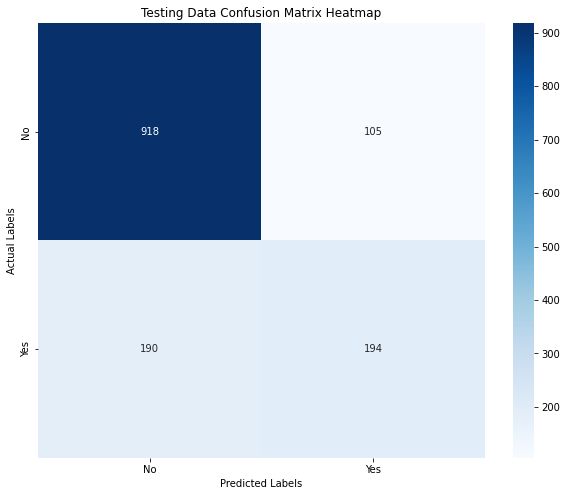

Accuracy: 0.790
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1023
           1       0.65      0.51      0.57       384

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [44]:

# ploting the confusion metrix plot
print('\033[1m' + 'Artificial Neural Network' , "Model" + '\033[0m')

conf_mat = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred_lis)
plt.figure(figsize = (10,8))
labelList = ["No", "Yes"]
sns.heatmap(conf_mat, annot=True,fmt='d', cmap="Blues", xticklabels=labelList,
            yticklabels=labelList)
plt.title("Testing Data Confusion Matrix Heatmap")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

NNacc = accuracy_score(y_test, y_pred_lis)
format_float = "Accuracy: {:.3f}".format(NNacc)
print(format_float)
print(classification_report(y_test,y_pred_lis))

[ Back to top ](#top)

## Models Comparison <a name="modcom"></a>

3 models had been built to predict the likelihood of a customer churning from the telco company, namely Logistic Regression(LR), Random Forest(RF) and Artificial Neural Network(ANN). Among the 3 models, LR is the simplest model that allow researchers to understand the important features that drives the prediction. In turn, it provides insights to what can be done to improve the marketing model. RF is widely popular that is able to sieve out non-linear relationship among the variables. However, understanding what are the important features from RF is alot more difficult than LR. Lastly, ANN works like the neural brain to find the most optimal weightage to correctly predict the target label. Even more difficult to understand than RF, ANN works like a black box and near impossible to see how predictions are derived.

Across the models, LR had outperformed RF and ANN. Accuracy may not be a good measurement, but as a rough guage, LR achieve 81.7% while the rest were below 80%. In our case of predicting churns, Recall would be the important guage to measure our model performance. Recall (aka Sensitivity) is the percentage of predicted churn that actually churned. So for example if our model predicted 10 customers that is likely to churn, and 8 of them end up churning, it means our Recall rate is 80%. Despite the recall rate for non-churner at 91%, our LR model only hit 56% for the churners, while RF and ANN managed Recall of 47% and 51% respectively. Since our dataset is imbalance, using F1-Score where both Precision and Recall were given balanced weightage will be ideal. The LR managed to achieve F1-Score of 62%, while the other 2 models only hit 56% and 57%. 

All 3 models had been built on one pass baseline configuration. To gain better prediction, each model hyperparameters can be further finetuned, either through feature selection, trial and error or GridSearch package. Other methods to improve the model performance can be through iterative increment of data to enhance the robustness of the model. Model such as ANN tend to perform well where tremendous amount of data (in millions), although the downside is that it is more resource intensive and lacks the ability to provide feature importance. Lastly, one of the reason why all models had low Recall rates could be due to imbalance data where 37% of customers churned while 63% stayed. Having a more balanced data will improve the model robustness and reliability.







Logistic Regression
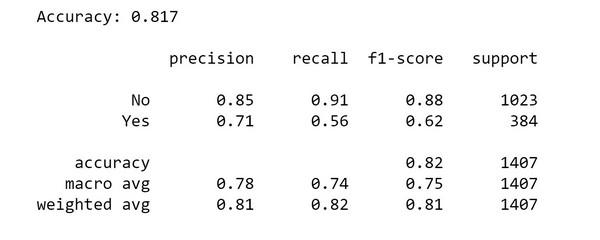

Random Forest
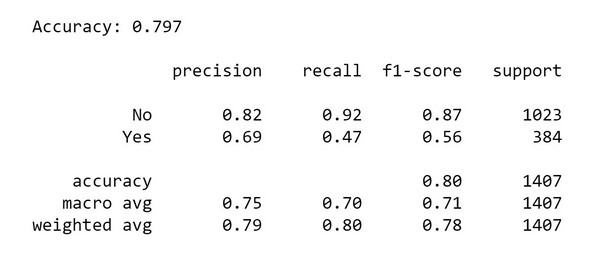

Artificial Neural Network
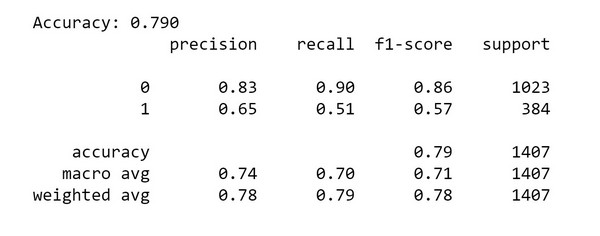

[ Back to top ](#top)

## Future Work <a name="futwork"></a>

- Feature engineering to reduce or create features that will enhance the model performance.
- Finetuning of model hyperparameters.
- Extraction of model features to understand customer characteristics and company services that affect churn results.
- Re-balance the dataset using method such as over/under-sampling or SMOTE.

## Campaign Analysis <a name="camana"></a>

To further improve the business, it has been tasked to do marketing campaign. To seek better understanding of online campaigns (eg Google/Facebook), one can do a Attribution Models. Attached with this model notebook, a HTML file converted from another modelling notebook has been submitted together. In the additional notebook, Markov Chain Multi-Touch Attribution (MTA) model was developed to gain insights into a marketing campaign and its effectiveness all done with data analytics. A dashboard was created together with the MTA model for more interactive visual on the dataset. 

URL:

[Multi-Touch Attribution Analysis](https://alexaw.photos/mta_model_analysis.html)

[Marketing Campaign Dashboard](https://public.tableau.com/app/profile/alex.aw5666/viz/shared/WGYWDS46N)



[ Back to top ](#top)

#### End